# 广告投入与产品销量预测

## 比较不同复杂度的OLS模型（1维特征、3维特征、3维特征）

## 1. 导入必要的工具包

In [1]:
#数据处理
import numpy as np 
import pandas as pd 

#数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 使用r2_score作为回归模型性能的评价
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error
#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 2. 读取数据

In [2]:
#读取数据
dpath = "./data/"
df = pd.read_csv(dpath + "FE_Advertising.csv")

#通过观察前5行，了解数据每列（特征）的概况
df.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


Text(0,0.5,u'\u5e7f\u64ad\u5e7f\u544a\u8d39\u7528')

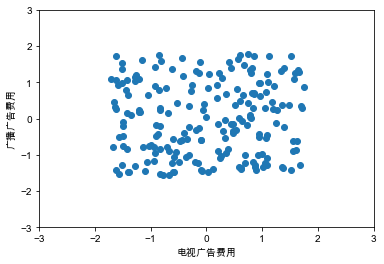

In [3]:
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.scatter(df['TV'], df['radio'])
plt.xlabel(u'电视广告费用')
plt.ylabel(u'广播广告费用')

## 3. 数据准备

In [4]:
# 从原始数据中分离输入特征x和输出y
y = df['sales']

#用3维特征
#X = df.drop('sales', axis = 1)
#feat_names = X.columns

#只用1维特征
X = df['TV']
X = X.values.reshape(-1, 1)
feat_names = ['TV']

#只用2维特征
#X = df.drop(['sales','newspaper'], axis = 1)
#特征名称，用于后续显示权重系数对应的特征
#feat_names = X.columns

In [5]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
#X_train.shape

## 4. 最小二乘线性回归

In [6]:
# 线性回归
from sklearn.linear_model import LinearRegression

# 1.使用默认配置初始化学习器实例
lr = LinearRegression()

# 2.用训练数据训练模型参数
lr.fit(X_train, y_train)

# 3. 用训练好的模型对测试集进行预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)


#性能评估，R方分数
print("The r2 score of LinearRegression on test is %f" %(r2_score(y_test, y_test_pred_lr)))
print("The r2 score of LinearRegression on train is %f" %(r2_score(y_train, y_train_pred_lr)))

#性能评估，R方分数
print("The MSE of LinearRegression on test is %f" %(mean_squared_error(y_test, y_test_pred_lr)))
print("The MSE of LinearRegression on train is %f" %(mean_squared_error(y_train, y_train_pred_lr)))

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef":list((lr.coef_.T))})
#fs.sort_values(by=['coef'],ascending=False)
fs = fs.append([{'columns':'intercept','coef':lr.intercept_}], ignore_index=True)
fs

The r2 score of LinearRegression on test is 0.645722
The r2 score of LinearRegression on train is 0.601754
The MSE of LinearRegression on test is 7.740833
The MSE of LinearRegression on train is 11.226449


,coef,columns
0,4.069426,TV
1,14.151614,intercept


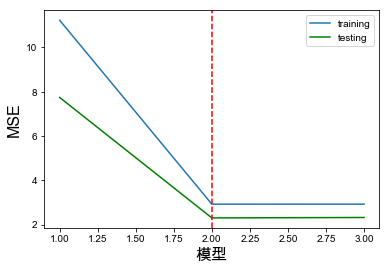

In [7]:
#分别用1维特征、2维特征、3维特征的模型的性能
train_mse_mean = [11.226449, 2.925021, 2.923704]
test_mse_mean = [7.740833, 2.302765, 2.321981]

x = [1, 2, 3]
plt.plot(x, train_mse_mean, label = 'training') 
plt.plot(x, test_mse_mean, 'g-',label = 'testing') 

#最佳超参数
plt.axvline(2, color='r', ls='--')

plt.xlabel(u'模型', fontsize = 16)
plt.ylabel('MSE', fontsize = 16)

plt.legend()
plt.show()

## 残差分布

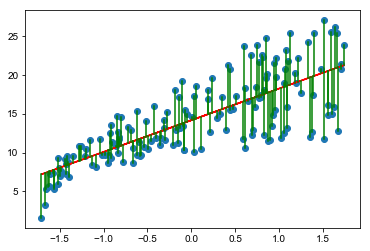

In [8]:
plt.scatter(X_train, y_train)

plt.plot(X_train, y_train_pred_lr,'r-')

# 预测残差
for idx,x in enumerate(X_train):
    plt.plot([x,x],[y_train.values[idx], y_train_pred_lr[idx]], 'g-')

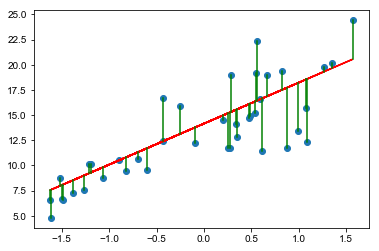

In [9]:
plt.scatter(X_test, y_test)

plt.plot(X_test, y_test_pred_lr,'r-')

# 预测残差
for idx,x in enumerate(X_test):
    plt.plot([x,x],[y_test.values[idx], y_test_pred_lr[idx]], 'g-')

Text(0.5,0,u'\u6b8b\u5dee')

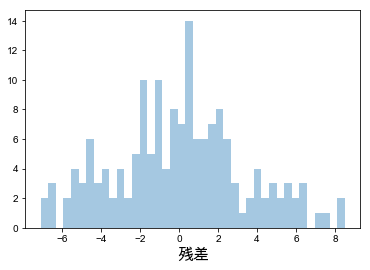

In [10]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
figsize = 11,9
res = y_train_pred_lr - y_train
sns.distplot(res, bins=40, kde = False)
plt.xlabel(u'残差', fontsize = 16)

看起来残差的分布并不符合0均值的正态分布

Text(0,0.5,u'\u6b8b\u5dee')

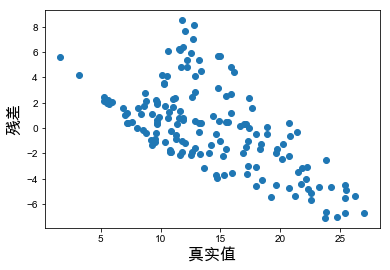

In [11]:
figsize = 11,9
plt.scatter(y_train, res)
plt.xlabel(u'真实值', fontsize = 16)
plt.ylabel(u'残差', fontsize = 16)

从真实值和残差的散点图来看，真实值和残差不是没有关系。
也就是说，模型还没有完全建模y与x之间的关系，还有一部分关系残留在残差中。